<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/6%EC%9D%BC%EC%B0%A8/seminar_note_1_1_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets
X, y = datasets.load_wine(return_X_y=True, as_frame=True)
df = X.merge(y, left_index=True, right_index=True)
df.head()
df.shape

(178, 14)

In [3]:
df.target.value_counts(normalize=True)

,proportion
target,
1,0.398876
0,0.331461
2,0.269663


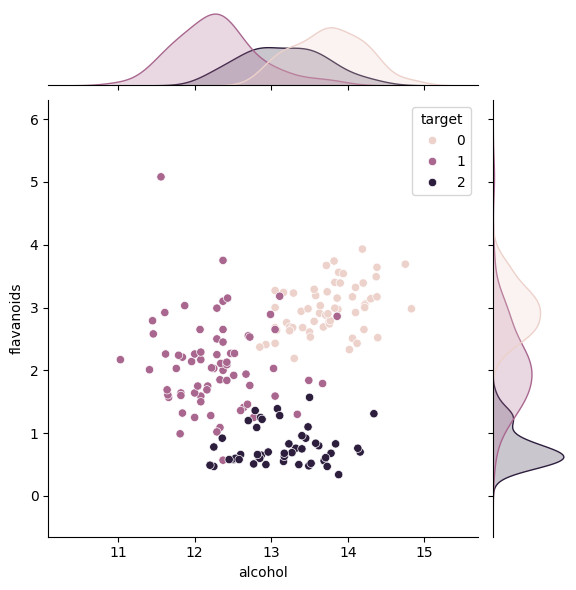

In [4]:
sns.jointplot(data=df, x='alcohol',y='flavanoids', hue='target')

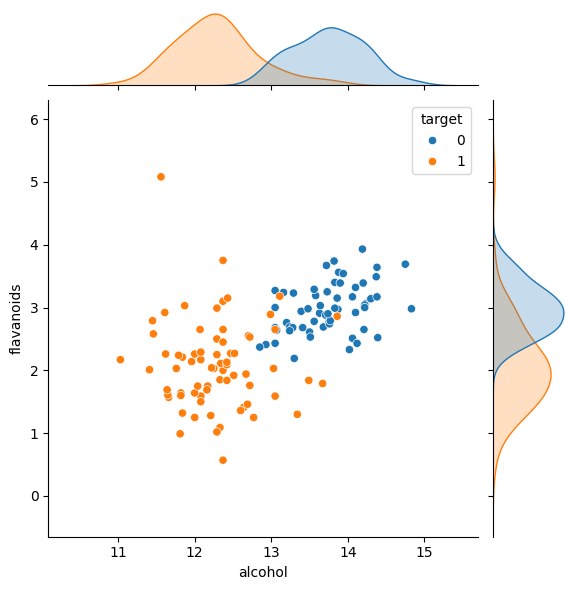

In [5]:
sns.jointplot(data=df.loc[df.target < 2, :], x='alcohol',y='flavanoids', hue='target')

In [6]:
data = df.loc[df.target < 2, :]
data_mean = data.groupby('target')[['alcohol','flavanoids']].mean().round(2).reset_index()
data_mean
X = data_mean.drop(['target'], axis=1)
y = data_mean['target']

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X,y)
clf.predict([[14, 1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [8]:
X = data[['alcohol','flavanoids']]
y = data['target']
y_pred = clf.predict(X)
(y_pred == y).mean()
from sklearn.metrics import accuracy_score # 사이킷런의 정확도 산출 모듈
accuracy_score(y_pred, y)

0.9230769230769231

In [9]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X,y)
y_pred = clf.fit(X,y).predict(X)
accuracy_score(y_pred, y)

1.0

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions # 2차원 특성변수의 분류경계선을 시각
clfs = [RandomForestClassifier(), LogisticRegression(), SVC(), GaussianNB(), KNeighborsClassifier()]

In [13]:
for i, clf in enumerate(clfs) :
    y_pred = clf.fit(X,y).predict(X)
    print(f'{clf}알고리즘의 예측 모형정확도 {accuracy_score(y_pred, y)}') # 정확도(Accuracy)

RandomForestClassifier()알고리즘의 예측 모형정확도 1.0
LogisticRegression()알고리즘의 예측 모형정확도 0.9307692307692308
SVC()알고리즘의 예측 모형정확도 0.9307692307692308
GaussianNB()알고리즘의 예측 모형정확도 0.9384615384615385
KNeighborsClassifier()알고리즘의 예측 모형정확도 0.9615384615384616


RandomForestClassifier()알고리즘의 예측 모형정확도 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


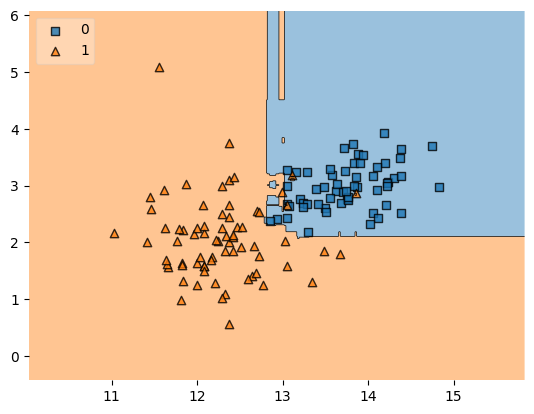

LogisticRegression()알고리즘의 예측 모형정확도 0.9307692307692308


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


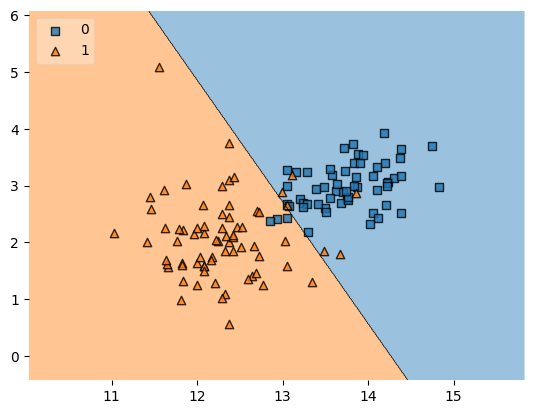

SVC()알고리즘의 예측 모형정확도 0.9307692307692308


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


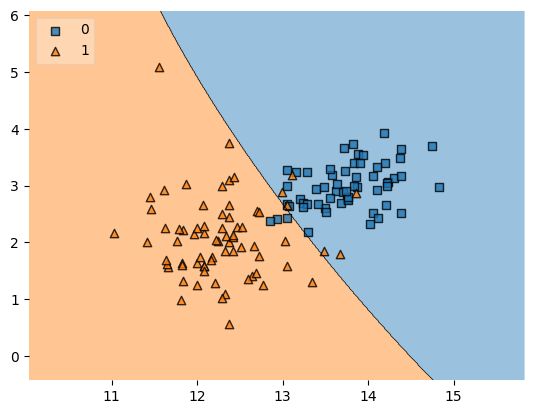

GaussianNB()알고리즘의 예측 모형정확도 0.9384615384615385


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


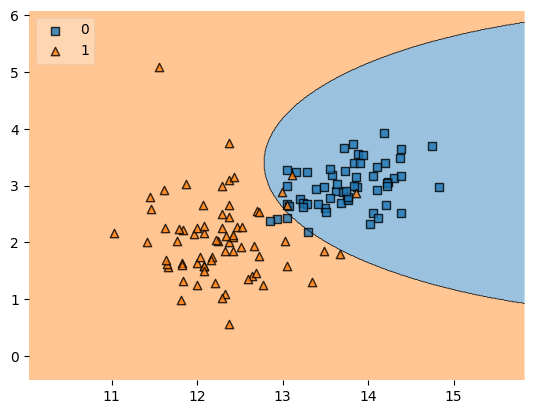

KNeighborsClassifier()알고리즘의 예측 모형정확도 0.9615384615384616


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


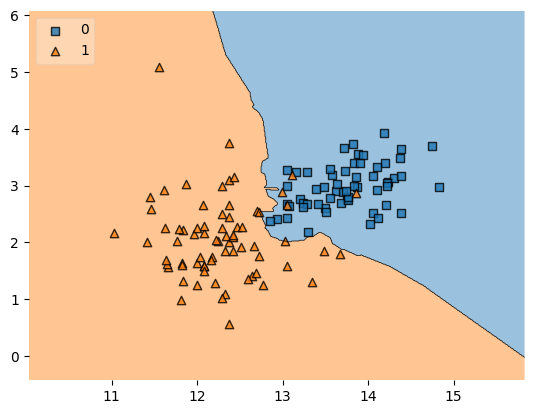

In [15]:
for i, clf in enumerate(clfs) :
    y_pred = clf.fit(X,y).predict(X)
    print(f'{clf}알고리즘의 예측 모형정확도 {accuracy_score(y_pred, y)}') # 정확도(Accuracy)
    plot_decision_regions(X.values, y.values, clf=clf, legend=2); plt.show()

## 새로운 데이터를 불러와서 예시로 보여준다

In [16]:
X_train = X[1::2]; y_train = y[1::2]
X_test = X[::2]; y_test = y[::2]
clf = LogisticRegression()
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_pred, y_test)

0.9538461538461539

In [17]:
from sklearn.model_selection import train_test_split # 훈련과 검증데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_pred, y_test)

0.9615384615384616

In [18]:
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit(X_train).transform(X_train)
X_test_std = StandardScaler().fit(X_test).transform(X_test)
y_pred= clf.fit(X_train_std, y_train).predict(X_test_std)
accuracy_score(y_pred, y_test)

0.9230769230769231

In [19]:
from sklearn.pipeline import make_pipeline
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
y_pred = pipe.fit(X_train, y_train).predict(X_test)
accuracy_score(y_pred, y_test)

0.9615384615384616

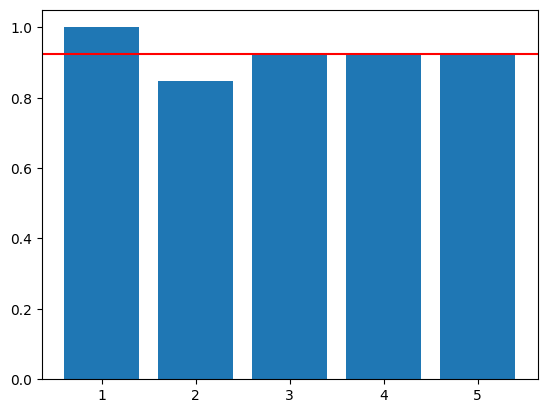

In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=11)
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train, y_train = X.iloc[train_index, :], y[train_index]
    X_test, y_test = X.iloc[test_index], y[test_index]
    y_predict = pipe.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))

plt.bar(np.arange(1, 6), accuracy_list)
plt.axhline(y=np.array(accuracy_list).mean(), color='r', linestyle='-')
plt.title('5 KFlod Accuracy')

In [25]:
from sklearn.model_selection import cross_validate
np.mean(accuracy_list)

np.float64(0.9230769230769231)

In [26]:

result = cross_validate(pipe, X, y, cv=kf)  # defaults to 5-fold CV
result['test_score'].mean()

np.float64(0.9230769230769231)

In [27]:
pipe


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [28]:
clf


LogisticRegression()

In [29]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distributions = {'randomforestclassifier__max_depth': np.random.choice(100, 50),
                       'randomforestclassifier__n_estimators' : np.random.choice(100, 50)
                      }
rs = RandomizedSearchCV(estimator=pipe,
                        n_iter=20,
                        param_distributions=param_distributions,
                        random_state=0, verbose=1)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20,
                   param_distributions={'randomforestclassifier__max_depth': array([66, 37, 17, 92, 12, 79, 23, 57, 24, 52, 45, 41, 31, 10, 25,  3, 17,
       65, 59, 70, 43, 71, 69,  0,  5, 21, 68, 83, 83, 87, 98, 21, 65, 20,
       19, 25, 72, 61, 26, 63, 39, 81, 86, 26, 22,  2, 19, 43, 63,  4]),
                                        'randomforestclassifier__n_estimators': array([92, 24, 13, 22, 39, 68, 29, 42, 85, 84, 39, 21, 99, 35, 86, 48, 72,
       69, 88,  4, 52, 96, 62, 81, 59, 36, 46, 11, 91, 96, 47, 72, 42, 94,
       32, 31, 16, 42,  9, 67, 89, 85, 37, 28, 45, 64, 20, 49, 72,  1])},
                   random_state=0, verbose=1)

In [32]:
print('optimal train score: {:.3f}'.format(rs.best_score_))
print('test score: {:.3f}'.format(rs.score(X_test, y_test)))
print('optimal parameter: {}'.format(rs.best_params_))

optimal train score: 0.952
test score: 0.962
optimal parameter: {'randomforestclassifier__n_estimators': np.int64(35), 'randomforestclassifier__max_depth': np.int64(3)}


In [33]:
results= pd.DataFrame(rs.cv_results_)[['params','mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score').round(4).head(10)

,params,mean_test_score,rank_test_score
2,"{'randomforestclassifier__n_estimators': 35, '...",0.9519,1
18,"{'randomforestclassifier__n_estimators': 68, '...",0.9424,2
7,"{'randomforestclassifier__n_estimators': 91, '...",0.9329,3
4,"{'randomforestclassifier__n_estimators': 94, '...",0.9329,3
11,"{'randomforestclassifier__n_estimators': 62, '...",0.9329,3
19,"{'randomforestclassifier__n_estimators': 20, '...",0.9329,3
17,"{'randomforestclassifier__n_estimators': 46, '...",0.9329,3
8,"{'randomforestclassifier__n_estimators': 99, '...",0.9329,3
5,"{'randomforestclassifier__n_estimators': 11, '...",0.9233,9
12,"{'randomforestclassifier__n_estimators': 24, '...",0.9233,10


In [34]:
from joblib import dump, load
dump(rs.best_estimator_, 'randoforest_randomized.joblib')

['randoforest_randomized.joblib']

# End